In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import math
import sys

# Aufgabe 7: Ausgleichproblem mittels QR-Zerlegung

Viele Versuche eine Menge von Messwerten durch ein Polynom niedrigen Grades zu verbinden, führen auf **Ausgleichsprobleme**.

Das Mittel der Wahl zum Lösen solcher Aufgaben ist die **QR-Zerlegung**. Diese kann relativ einfach mit Hilfe von **Householder-Matrizen** bestimmt werden.

Schreiben Sie eine Funktion `Q, R = householder(A)`, welche zu einer gegebenen, rechteckigen Matrix $A\in\mathbb{R}^{n\times m}$ die Faktoren $Q$ und $R$ so bestimmt, dass $A = QR$ ist, wobei $Q$ eine orthogonale Matrix und $R$ eine obere Dreiecksmatrix sein soll.

Anschließend ist die Funktion `x = ausgleichsproblem(A, b)` zu schreiben, welche ein gegebenes Ausgleichproblem $\Vert Ax-b \Vert_{2} = \min_{y\in \mathbb{R} ^m} \Vert Ay -b \Vert_2$ löst.


> **Programmtechnischer Hinweis:**
> Numpy stellt Funktion wie `np.linalg.qr()` bereit, welche Sie gerne zum Vergleichen oder zur Fehlersuche verwendet werden dürfen. In > Ihrer Lösung haben diese aber nichts zu suchen, eine entsprechende Abgabe wird nicht akzeptiert.

In [26]:
def householder(A):
    """
    QR-Zerlegung mittels Householder-Reflexionen

    Hier sollen Q und R als voll besetzte Matrizen ausgegeben werden.
    """
    n, m = A.shape
    R = np.copy(A)
    Q = np.eye(n, dtype=np.float64)
    
    for j in range(m):  # Spalte
        if j >= n:
            break
        v = np.copy(R[j:, j])
        alpha = la.norm(v, ord=2)
        if v[0] > 0.0:
            alpha = -alpha
        v[0] = v[0] - alpha
        v_norm_squared = np.inner(v, v)
        if v_norm_squared > 0.0:
            Q_j = np.eye(n - j) - np.outer(((2.0 / v_norm_squared) * v), v)
            Q[:, j :] = np.dot(Q[:, j :], Q_j)
            R[j :,j :] = np.dot(Q_j, R[j :, j :])
            R[(j + 1) :, j] = 0.0  # gegen Rundungsfehler
    return Q, R


def ausgleichsproblem(A, b):
    """
    Loesung eines Ausgleichsproblems mittels QR-Zerlegung
    """
    n, m = A.shape
    
    Q, R = householder(A)
    Qb = np.dot(Q.T, b)
    
    x = np.zeros(m)
    for i in range(m - 1, -1, -1):
        x[i] = (Qb[i] - np.inner(R[i, i + 1 :], x[i + 1 :])) / R[i, i]
        
    return x

## Testskript

Testen Sie diese Funktionen mit dem Testskript. Führen Sie alle Testfälle aus (Eingabe 6 -> 4 -> 4).

Dabei wird eine Punktwolke mit Polynomen ersten bis dritten Grades angenähert. In den entstehenden Graphiken ist die **rote Kurve** die Lösung, die durch die QR-Zerlegung berechnet wird. Die **blaue Kurve** wurde mittels des Normalengleichungssystems bestimmt. Des Weiteren wird jeweils die Größe des Residuums bestimmt.

Funktion [ 1:sin,  2:exp,  3:cubic,  4:cubic gestört,  5:zufällig,  6:alles ]   6
Anzahl Punkte [ 1:10,  2:100,  3:1000,  4:alles ]   4
Grad des Polynoms [ 1:linear,  2:quadratisch,  3:kubisch,  4:alles ]   4



Sinus
--------------------------------
Punktzahl: 10,  Polynomgrad: 1, Residuum mit QR: 1.6270076588042695, mit Normalengleichung: 1.6270076588042786
Punktzahl: 10,  Polynomgrad: 2, Residuum mit QR: 1.6270076588042695, mit Normalengleichung: 1.6270076588042794
Punktzahl: 10,  Polynomgrad: 3, Residuum mit QR: 0.2555288388395987, mit Normalengleichung: 1.088403021564299
Punktzahl: 100,  Polynomgrad: 1, Residuum mit QR: 4.507556368101547, mit Normalengleichung: 4.507556368101557
Punktzahl: 100,  Polynomgrad: 2, Residuum mit QR: 4.507556368101551, mit Normalengleichung: 4.507556368101564
Punktzahl: 100,  Polynomgrad: 3, Residuum mit QR: 0.6896287466887886, mit Normalengleichung: 4.389029882940209
Punktzahl: 1000,  Polynomgrad: 1, Residuum mit QR: 14.026837632308293, mit Normalengleichung: 14.02683763230829
Punktzahl: 1000,  Polynomgrad: 2, Residuum mit QR: 14.026837632308293, mit Normalengleichung: 14.026837632308881
Punktzahl: 1000,  Polynomgrad: 3, Residuum mit QR: 2.104051971794369, mi

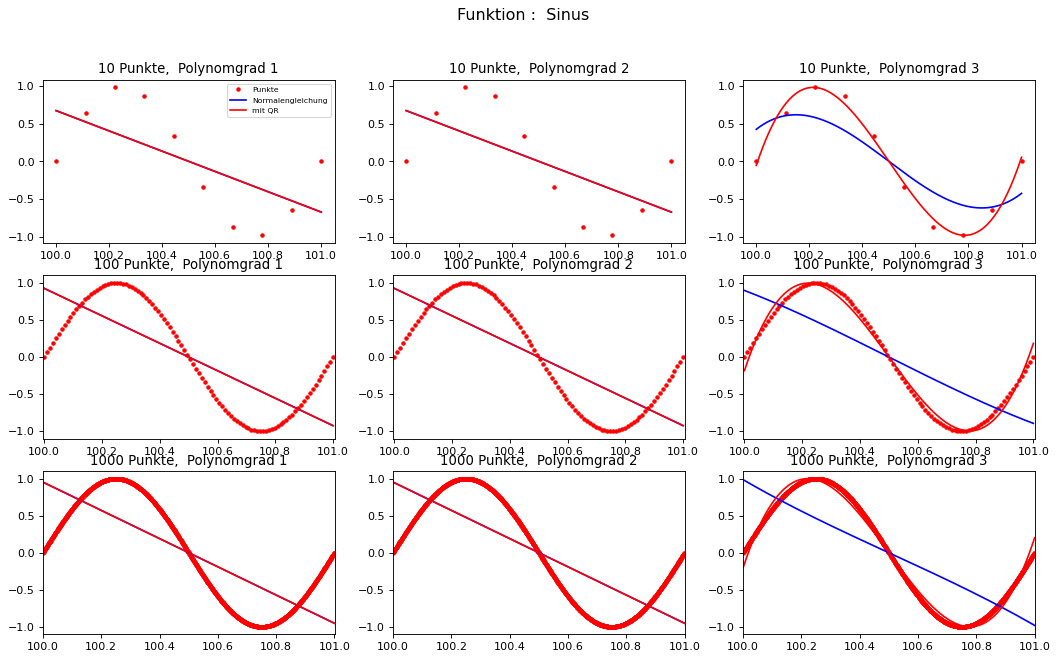

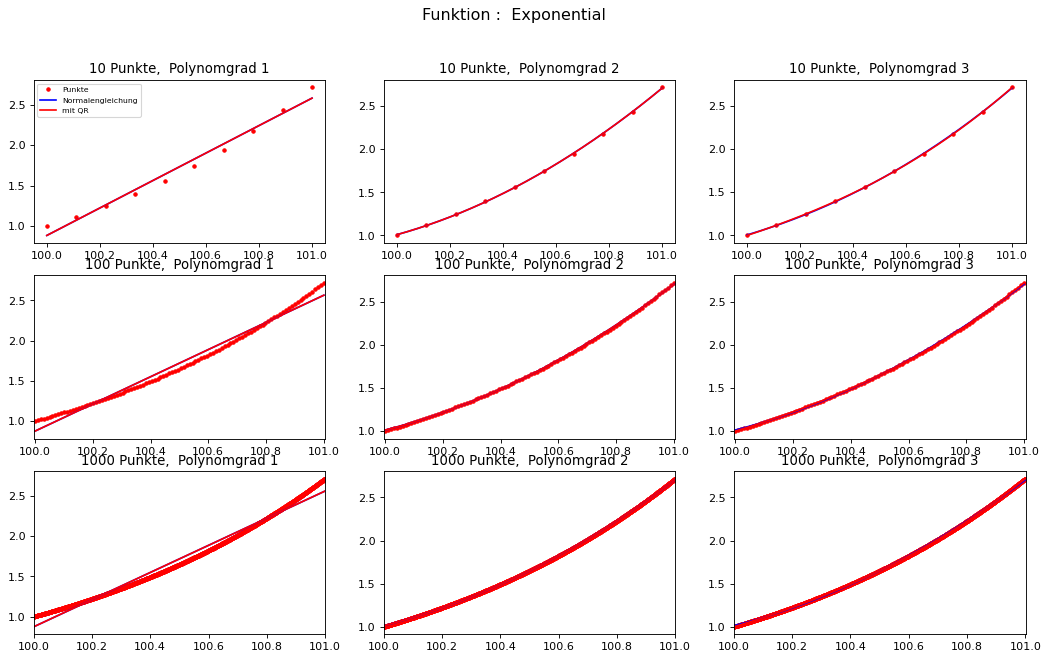

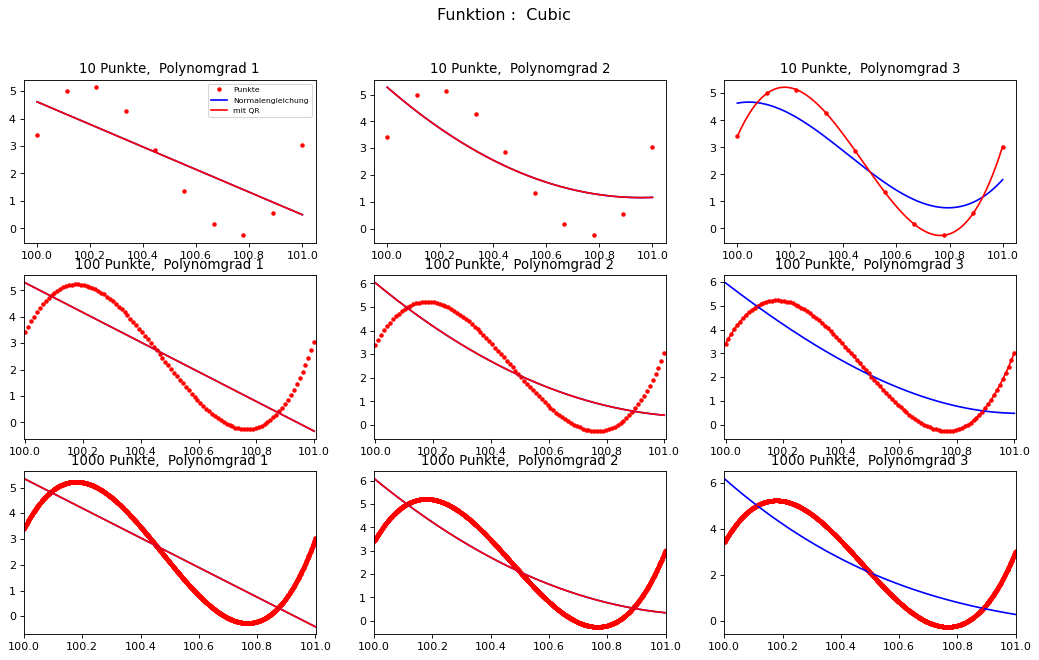

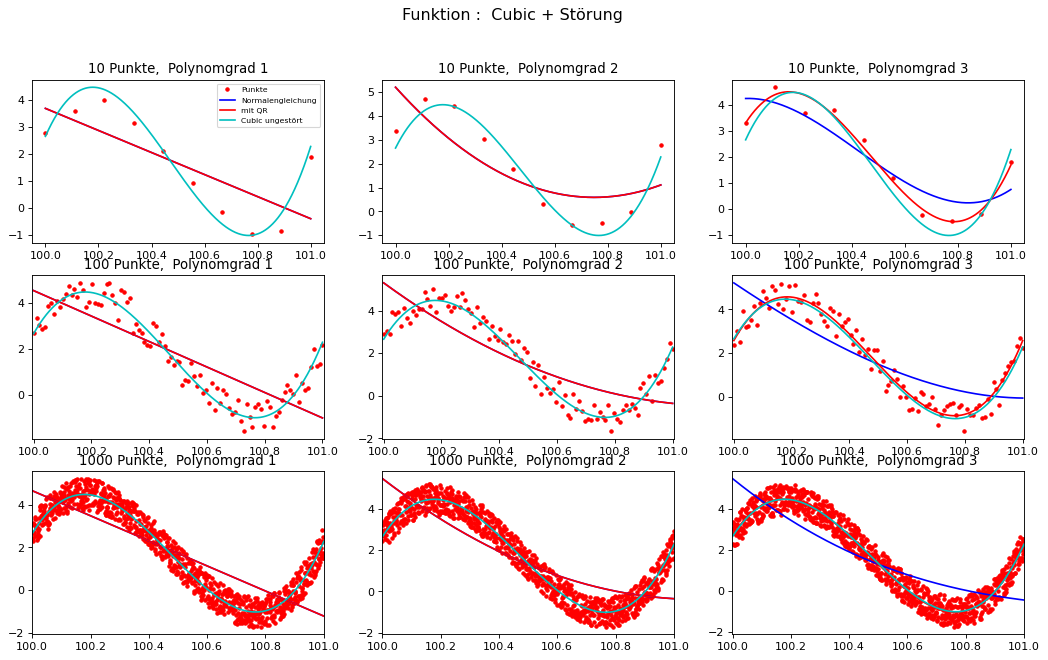

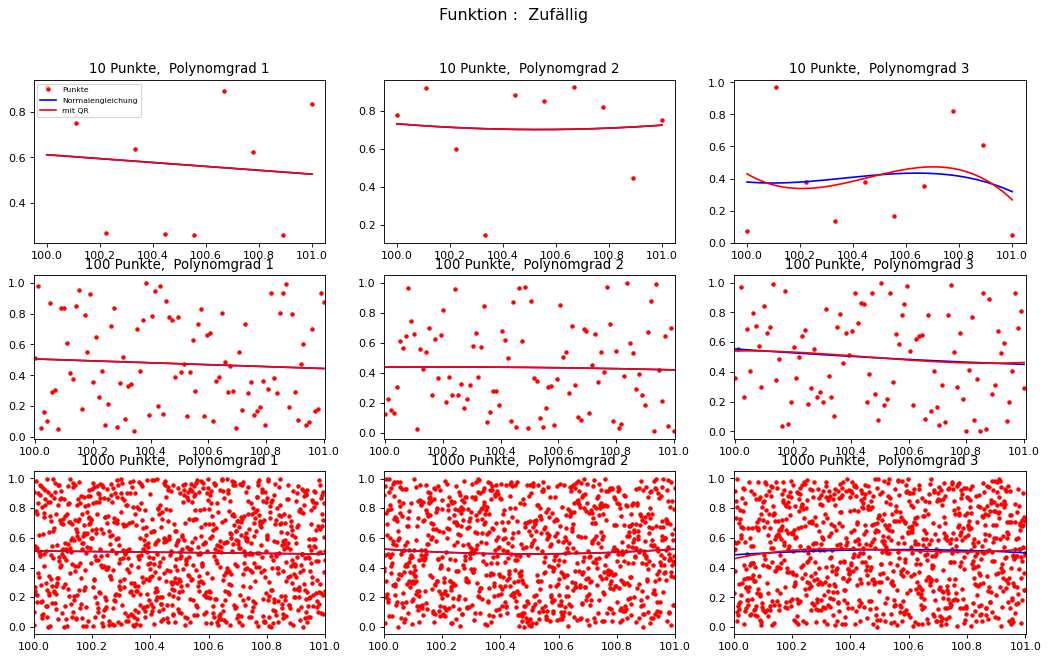

In [31]:
def poly(x, par):
    """
    Auswertung des Polynoms mit Koeffizienten par an der Stelle x
    """
    y = np.ones_like(x) * par[-1]
    for i in range(2, len(par) + 1):
        y *= x
        y += par[-i] * np.ones_like(x)
    return y


def menu(pro, sel):
    """
    Funktion, die den User nach einer Eingabe aus den angegebenen Optionen frägt
    """
    xn = len(sel)
    if xn < 1:
        return 0
    txt = pro + " [ 1:" + sel[0]
    for i in range(1, xn):
        txt = txt + ",  " + str(i + 1) + ":" + sel[i]
    txt = txt + " ]  "
    n = 0
    while (n < 1) or (xn < n):
        n = int(input(txt))
    return n


funktionsnamen_menu = ["sin", "exp", "cubic", "cubic gestört", "zufällig", "alles"]
funktionsnamen_print = ["Sinus", "Exponential", "Cubic", "Cubic + Störung", "Zufällig"]

choice = menu("Funktion", funktionsnamen_menu)
if choice == 6:
    funktionen = [1, 2, 3, 4, 5]
else:
    funktionen = [choice]
    
choice = menu("Anzahl Punkte", ["10", "100", "1000", "alles"])
if choice < 4:
    punkte = [int(10**choice + 0.5)]
else:
    punkte = [10, 100, 1000]

choice = menu("Grad des Polynoms", ["linear", "quadratisch", "kubisch", "alles"])
if choice == 4:
    grade = [1, 2, 3]
else:
    grade = [choice]

err_max = 0

#  Jede angeforderte Funktion wird in einer eigenen Grafik gezeigt.
#  Fall mehrere Punkt-Zahlen und/oder Polynom-Grade gewuenscht sind,
#  werden die Grafiken in 3 bzw. 3*3 Teile unterteilt.
for funktion in funktionen:
    plt.figure("Ausgleichsrechnung Funktion %s" % funktionsnamen_print[funktion - 1], figsize=(16, 9), dpi=80)
    print("\n" + funktionsnamen_print[funktion-1] + "\n--------------------------------")
    for (index_n, n) in enumerate(punkte):
        for grad in grade:
            x_data = np.linspace(100.0, 101.0, n)
            
            if funktion == 1:
                b = np.sin(2.0 * math.pi * (x_data - x_data[0]))
            elif funktion == 2:
                b = np.exp(x_data - x_data[0])
            elif funktion == 3:
                coefficients = np.array([1.0, -2.0, 0.5, 0.25])
                b = poly((x_data - x_data[0]) * 6.0 - 3.5, coefficients)
            elif funktion == 4:
                coefficients = np.array([1.0, -2.0, 0.5, 0.25])
                b = poly((x_data - x_data[0]) * 6.0 - 3.5, coefficients) - 1.5 * np.random.random(n)
            elif funktion == 5:
                b = np.random.random(n)
                
            A = np.ones((n, grad + 1), dtype=np.float64)
            for i in range(1, grad + 1):
                A[:, i] = x_data**i
                
            # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
            #  Aufruf der selbst-programmierten Funktion ausgl
            #  ausgl() verwendet selbst-programmierte Funktion house()
            loesung_qr = ausgleichsproblem(A, b)
            #  Zum Vergleich: Ausgleichsrechnung mit Normalengleichungen
            loesung_normalgl = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, b))
            # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            # Plotting
            y_qr = np.dot(A, loesung_qr[: (grad + 1)])
            y_normalgl = np.dot(A, loesung_normalgl)
            residuum_qr = la.norm(y_qr - b, ord=2)
            residuum_normalgl = la.norm(y_normalgl - b, ord=2)
            if (len(grade) == 1) and (len(punkte) == 1):
                plt.subplot(1, 1, 1)
            elif len(grade) == 1:
                plt.subplot(1, len(punkte), index_n + 1)
            elif len(punkte) == 1:
                plt.subplot(1, len(grade), grad)
            else:
                plt.subplot(len(punkte), len(grade), index_n * len(grade) + grad)
            x_plot = np.linspace(100.0, 101.0, 1001)  #  Plot X-Werte
            plt.suptitle("Funktion :  " + funktionsnamen_print[funktion - 1], fontsize="x-large")
            plt.plot(x_data, b, "r.", label="Punkte")
            plt.plot(x_plot, poly(x_plot, loesung_normalgl), "b-", label="Normalengleichung")
            plt.plot(x_plot, poly(x_plot, loesung_qr[: (grad + 1)]), "r-", label="mit QR")
            if funktion == 4: # Poly gestört
                ungestoert = poly((x_plot - x_data[0]) * 6.0 - 3.5, coefficients)
                plt.plot(
                    x_plot, ungestoert - 0.75, "c-", label="Cubic ungestört"
                )  # Original-Daten ohne Stoerung
            plt.xlim(x_plot[0] - 0.5 / n, x_plot[-1] + 0.5 / n)
            plt.title("%d Punkte,  Polynomgrad %d" % (n, grad))
            if index_n * len(grade) + grad == 1:
                plt.legend(loc=0, fontsize="x-small")
                
            print(f"Punktzahl: {n},  Polynomgrad: {grad}, Residuum mit QR: {residuum_qr}, mit Normalengleichung: {residuum_normalgl}")
            ref, _res, _, _ = np.linalg.lstsq(A, b, rcond=-1)
            relative_error = np.linalg.norm(loesung_qr - ref) / np.linalg.norm(ref)
            err_max = max(err_max, relative_error)
            if relative_error >= 1e-4:
                print("Ihre Lösung ist hier nicht korrekt! Bitte überprüfen Sie Ihren Code!")

assert err_max < 1e-4, "Ihre Lösung ist nicht korrekt! Siehe Fehlermeldung weiter oben. Bitte überprüfen Sie Ihren Code!"
                
sys.stdout.flush()
plt.show()